***

 <h1><center>Machine Learning - Boston Housing Dataset</center></h1> 

***


![Boston](https://datasmarts.net/wp-content/uploads/2017/12/boston.jpeg)

***

## Introduction

Boston Housing dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was originally published by Harrison, D. and Rubinfeld, D.L. `Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.[1]

In this study Harrison and Rubinfield look at the problems associated with using housing market data for measuring the willingness to pay for clean air. MEDV, the median value of house prices is the dependent variable in this study and NOX, the nitrate oxides concentration is an indendent variable and a measure of air pollution. This paper makes the assumption that 
people will pay for better air and this is reflected in the housing values in those neighbourhoods. It goes on to build a housing model to predict if this is indeed the case.[2]

My research into the boston housing dataset has shown that is a popular machine learning dataset and is commonly referenced
in data science articles. Most of the articles focus on the variables with the highest correlation coefficient and
then go on to do some linear regression modelling [3][4][5]. In an artice by Ritie Ng, he notes an intereseting point that
"16 data points have an 'MEDV' value of 50.0. These data points likely contain missing or censored values and have been removed".[6] 

Within the dataset , there are 506 rows, 14 attributes with MEDV being the target attribute. The definitions of these attributes are outlined in the cells below. 


Next I will outline the project requirements:

![ProjectSpecs.png](https://raw.githubusercontent.com/donalcarr/Datasets/master/ProjectSpecs.png)


As per the project specifications, this notebook will be split into three sections starting with an analysis of the dataset
using **descriptive statistics**.

First I will import the libraries needed to carry out my analysis.

In [1]:
#import python libraries for code execution
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 
import scipy.stats as ss

***

## Descriptive Statistics

For this section of the analysis I will briefly look at the characteristics of the dataset; then analyse three variables
that are commonly cited in previous analysis on this dataset: LSTAT, RM AND MEDV. 

I will use statistics such as the mean, median, min and max along 
with histograms and box blots to visualise and understand the distribution data. 

In [2]:
#boston housing dataset is available in the sklearn library
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [3]:
#prints the variables and information about the dataset
print(boston_dataset.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
#creates a dataframe for analysing the dataset
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
#.head gives me a view of the first 5 rows in the dataset
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
#.tail gives me a view of the last 5 rows in the dataset
boston.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [6]:
#add taget variable price to dataset
boston["MEDV"] = boston_dataset.target

In [7]:
#TRANSFORM ROWS TO COLUMNS to get a view of the descriptive statistics for dataset

boston.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


Next I will carry out an analysis of the target variable MEDV.

***

### MEDV - Median House Value

In [8]:
min_price = boston.MEDV.min()
max_price = boston.MEDV.max()
mean_price = boston.MEDV.mean()
median_price = boston.MEDV.median()
std_dev_price = boston.MEDV.std()

In [9]:
print("Min price: ${}".format(min_price)) 
print("Max price: ${}".format(max_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_dev_price))

Min price: $5.0
Max price: $50.0
Mean price: $22.532806324110698
Median price $21.2
Standard deviation of prices: $9.19710408737982


You can see that minimum and maximum prices are quite low for houses given the current house prices but one must
remember that this research was carried out in the 1970's when house prices were much lower. 

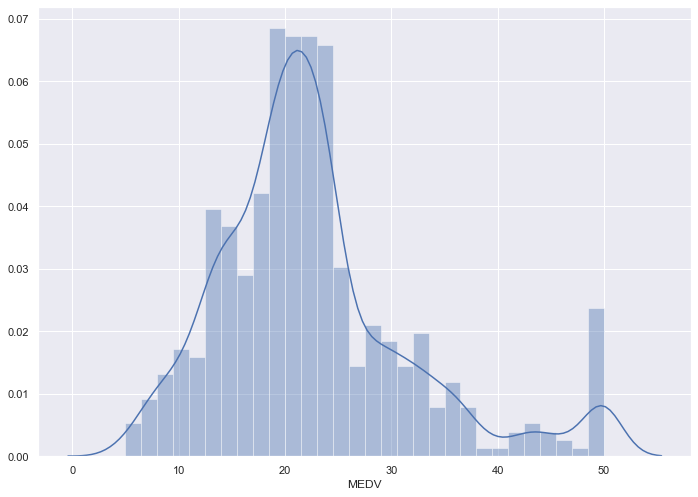

In [10]:
##https://seaborn.pydata.org/generated/seaborn.distplot.html
## plot histogram of median house prices to understand the distribution of the data
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

The distribution of the data is mostly following a normal distribution with some skewness to the right between the 40,000 to 50,000 price range. The mean of the dataset 22 and you can see that most of the datapoints are centred around the data point
with the kernal estimation also peaking at the mean.

Next I will get a betteer view of the outliers using a boxplot chart.

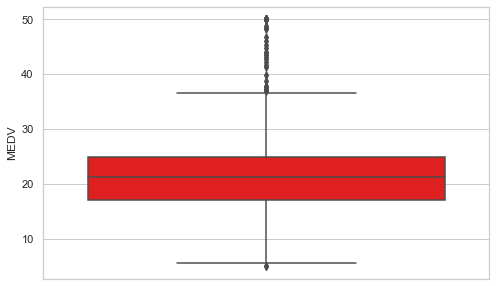

In [11]:
##https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot
## plot boxplot to understand outliers
fig = plt.gcf()
fig.set_size_inches( 8, 5)
sns.set(style="whitegrid")
sns.boxplot(y="MEDV",data=boston,color="red")

As per the histogram, I can see that the outliers are mostly in the range between 40 to 50 thousand. Interestingly,
one outlier is priced at 5 thousand which seems like a very low price for a home given the mean is 22 thousand. One could remove the outliers at the furthest points from the mean if they felt these data points were not representative of the population but they will be removed for this analysis

As per my introduction, previous research suggests there is a correlation between RM, LSTAT and MEDV I will look at the plots for both of these independent variables now. 

***

### LSTAT - Lower status of the population

In [12]:
min_priceLSTAT = boston.LSTAT.min()
max_priceLSTAT = boston.LSTAT.max()
mean_priceLSTAT = boston.LSTAT.mean()
median_priceLSTAT = boston.LSTAT.median()
std_dev_priceLSTAT = boston.LSTAT.std()

In [13]:
print("Min: {}%".format(min_priceLSTAT)) 
print("Max: {}%".format(max_priceLSTAT))
print("Mean: {}%".format(mean_priceLSTAT))
print("Median {}%".format(median_priceLSTAT))
print("Standard deviation: {}%".format(std_dev_priceLSTAT))

Min: 1.73%
Max: 37.97%
Mean: 12.653063241106723%
Median 11.36%
Standard deviation: 7.141061511348571%


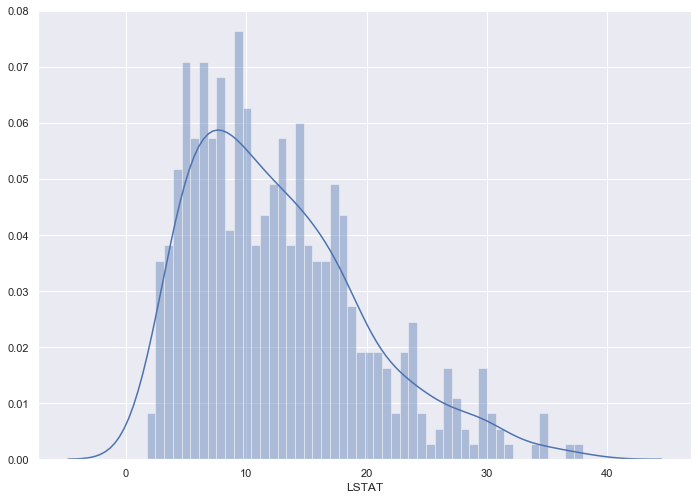

In [14]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['LSTAT'], bins=50)
plt.show()

The distribution of the LSTAT is right skewed and this can be seen visually through the longer tail to the right.
Typically the mean is greater than the median in right skewed distributions and this is the case here.

Mean 12.65% > Median 11.36%

LSTAT indicates the proportion of the population in that neigbourhood that are deemed to be of lower status. We can see that 
on average 11% of the population in these neighborhoods are deemed to be of lower status, with some outliers in the 30 to 40% range[6]

Next I will get a more specific view of the outliers using a boxplot chart.

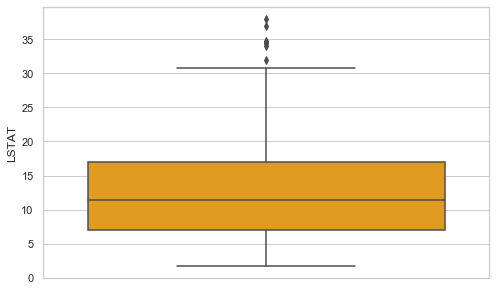

In [15]:
# plot boxplot to understand outliers
fig = plt.gcf()
fig.set_size_inches( 8, 5)
sns.set(style="whitegrid")
sns.boxplot(y="LSTAT",data=boston,color="orange")

We can see that the outliers exist in the 30 to 35% range and most of the neighbourhoods have an LSTAT between 7 and 17%.

The final variable I will investigate is RM 'average number of rooms per dwellling' as this variable also had a strong correlation with MEDV according to previous research.

***

### RM - Average number of rooms per dwelling

In [16]:
min_priceRM = boston.RM.min()
max_priceRM = boston.RM.max()
mean_priceRM = boston.RM.mean()
median_priceRM = boston.RM.median()
std_dev_priceRM = boston.RM.std()

In [17]:
print("Min: {}".format(min_priceRM)) 
print("Max: {}".format(max_priceRM))
print("Mean: {}".format(mean_priceRM)) # error with round function unsure why (TO BE FIXED)
print("Median {}".format(median_priceRM))
print("Standard deviation: {}".format(std_dev_priceRM))

Min: 3.561
Max: 8.78
Mean: 6.284634387351787
Median 6.2085
Standard deviation: 0.7026171434153237


From the above statistics we can see the minumum number of rooms in a dwelling is 3 with maximum being 8 and the mean around 6.

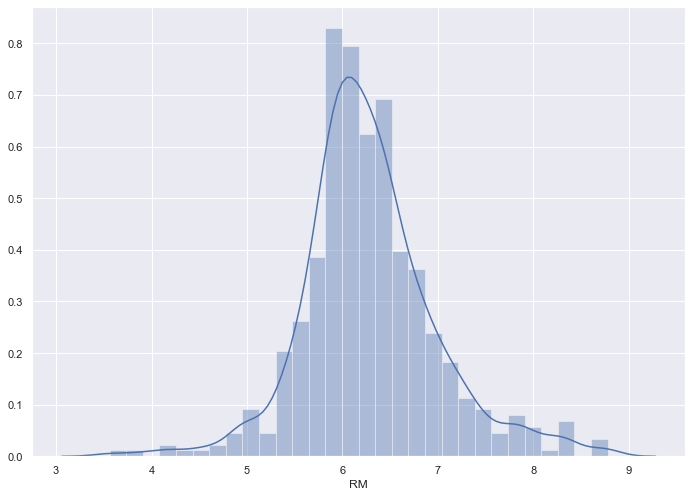

In [18]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['RM'], bins=30)
plt.show()

We can see from the above histogram that population is normally distributed with very little skewness. A typical normally distribution would have an equal median and mean and we can see that both the mean and median are at 6.2 rooms per dwelling. 

Next I will get a more specific view of the outliers using a boxplot chart.

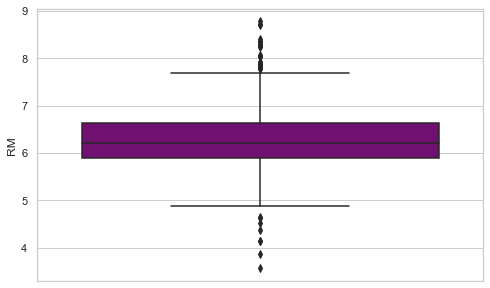

In [19]:
# plot boxplot to understand outliers
fig = plt.gcf()
fig.set_size_inches( 8, 5)
sns.set(style="whitegrid")
sns.boxplot(y="RM",data=boston,color="purple")

Boxplot indicates that the population centres around 6.2 rooms with outliers at over 8 rooms and less than 5. 

Next I will briefly look at the relationships between all the variables in the dataset and then focus on the category variable CHAS Charles River dummy variable and
its relationship to MEDV.

***

# Inferential Statistics

Intuitively, one would expect the following relationships between LSTAT, RM, CHAS and MEDV:

- linear relationship as more rooms equals more space, hence a higher MEDV

- Where the LSTAT is lower one would expect the MEDV to be lower as the neighborhhod may have issues with crime etc.

- Houses in neighbourhoods that tracts the river would have higher values due to views of the river and possibly less 
  congestion
  
Following on from those intuitions I will model the relationships bwtween the variables focusing on CHAS and MEDV relationship.

***

### Correlation

As already mentioned, previous research has indicated a strong relationship between LSTAT, RM and MEDV and the following
heatmap replicates that view. 

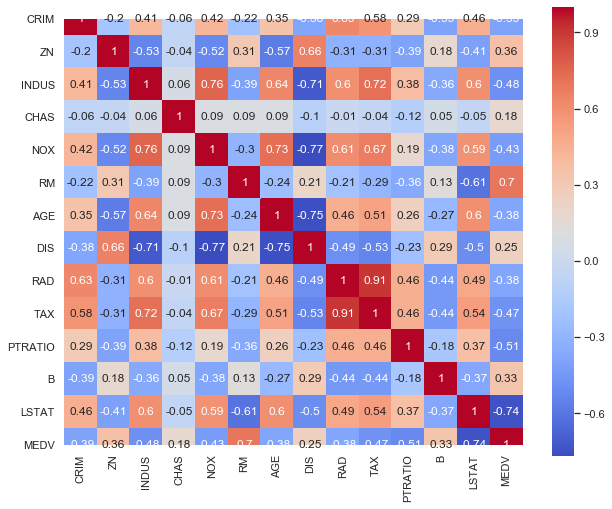

In [20]:
#set plot size
sns.set(rc={'figure.figsize':(10.27,8.27)})
# heatmap for correlation analysis
sns.heatmap(boston.corr().round(2), square=True, annot=True,cmap ='coolwarm')


The strongest positive correlations are displayed in dark green and the strongest negative correlations are displayed
in red - between 1 and minus 1

The dependent variable (target variable) is MEDV (median house value) and the strongest correlation is with
LSTAT (lowest status of the poulation) -0.74 and RM 0.7. A correlation can also be seen between MEDV and RM (0.7) RM and LSTAT (-0.61), but there is no correlation between MEDV and CHAS. 



 Following on from the correlation matrix we can look at a pairplot chart that models the linear relationship between 
 MEDV, LSTAT and RM.

***

### **Regression**

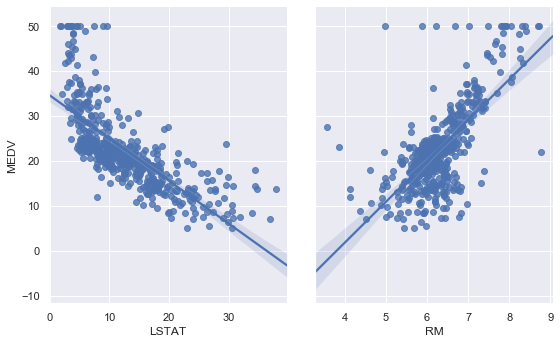

In [21]:
# regression plots
sns.pairplot(boston, x_vars=["LSTAT", "RM"], y_vars=["MEDV"],
            height=5, aspect=.8, kind="reg",palette="husl");


We can see that there is a linear relationship between both variables and MEDV, although the population does not completely
follow linearly with some outliers. A negative linear relationship exists between LSTAT and MEDV indicating that house prices
are higher where the LSTAT is lower. 
A positive linear relationship exists between RM and MEDV indicating that house prices are higher for homes with more rooms. 
We can see see outlier in both charts e.g. houses with between 5 and 9 rooms commanding the max MEDV and this could be associated with location and build of the house.

Next I will use the polyfit method in the numpy library as an alternative to the linear plots as I can see that both variables
have non-linear variances. If the polyfit was a better fit than the linear regression line you could then use
the polyfit features in you machine learning model. [30]

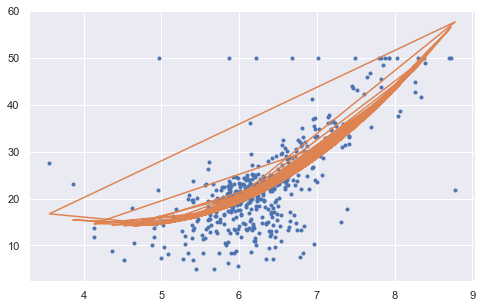

In [22]:
##set chart size
fig = plt.gcf()
fig.set_size_inches( 8, 5)
##https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html[28]
trend = np.polyfit(boston['RM'],boston['MEDV'],2)
plt.plot(boston['RM'],boston['MEDV'],'.')
trendpoly = np.poly1d(trend) 
plt.plot(boston['RM'],trendpoly(boston['RM']))


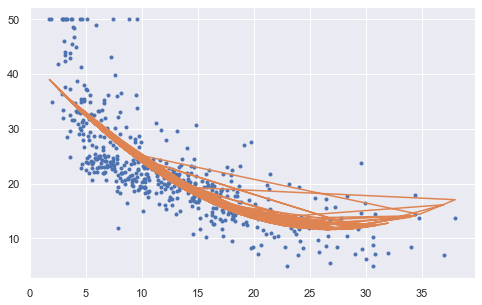

In [23]:
fig = plt.gcf()
fig.set_size_inches( 8, 5)
trend2 = np.polyfit(boston['LSTAT'],boston['MEDV'],2)
plt.plot(boston['LSTAT'],boston['MEDV'],'.')
trendpoly2 = np.poly1d(trend2) 
plt.plot(boston['LSTAT'],trendpoly2(boston['LSTAT']))

***

### CHAS - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

To start analysing the CHAS variable and its association with MEDV I need to first create a new category variable called CHAScat

In [24]:
## create a new category variable to analyse CHAS
boston["CHAScat"] = boston["CHAS"].astype('category')


Next I want to know how many neighbourhoods bound the river

In [25]:
## get count of neighbourhoods with houses that bounds or does not bound the river
boston.groupby('CHAScat')['MEDV'].count()

CHAScat
0.0    471
1.0     35
Name: MEDV, dtype: int64

I can see that 35 neighbourhoods bound the river while 471 do not. Next I will compute the mean and median of the house prices in both categories.

Then, I will use boxplots to visually compare the median price of houses in both categories to see if there is a difference in price. It will also give me a view of the maximum and minimum prices of both. 


In [26]:
print("The median house price is:",boston.groupby('CHAScat')['MEDV'].median())
print("The average house price is:",boston.groupby('CHAS')['MEDV'].mean())
print("The minimum house price is:",boston.groupby('CHAScat')['MEDV'].min())
print("The maximum house price is:",boston.groupby('CHAS')['MEDV'].max())

The median house price is: CHAScat
0.0    20.9
1.0    23.3
Name: MEDV, dtype: float64
The average house price is: CHAS
0.0    22.093843
1.0    28.440000
Name: MEDV, dtype: float64
The minimum house price is: CHAScat
0.0     5.0
1.0    13.4
Name: MEDV, dtype: float64
The maximum house price is: CHAS
0.0    50.0
1.0    50.0
Name: MEDV, dtype: float64


I can see that the median and mean are higher for houses in neighbourhoods by the river. 

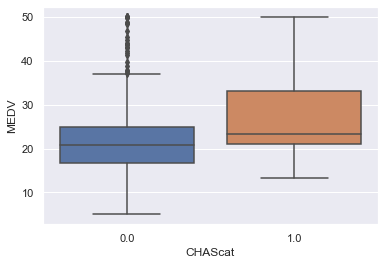

In [27]:
%matplotlib inline
sns.boxplot(x='CHAScat', y='MEDV', data=boston)

The category labels X are defined as follows:
- 1 represents neighbourhoods with land that bounds the river while;
- 0 represents neighbourhoods that are not by the river.

One would expect that houses closer to the river would have higher median prices and we can see from the median and average prices that this is the case. The box plot on the right clearly shows as illustrated by the brown rectangle that prices are higher. The rectangles in both charts represent the interquartile range (25-75% percentile). 

Next I will use a histogram plot form the seaborn library to plot both distributions on top of each other to get a visual
understanding of their comparative distributions. 

In [28]:
tract0 = boston['MEDV'][boston['CHAScat'] == 0]

In [29]:
tract1 = boston['MEDV'][boston['CHAScat'] == 1]

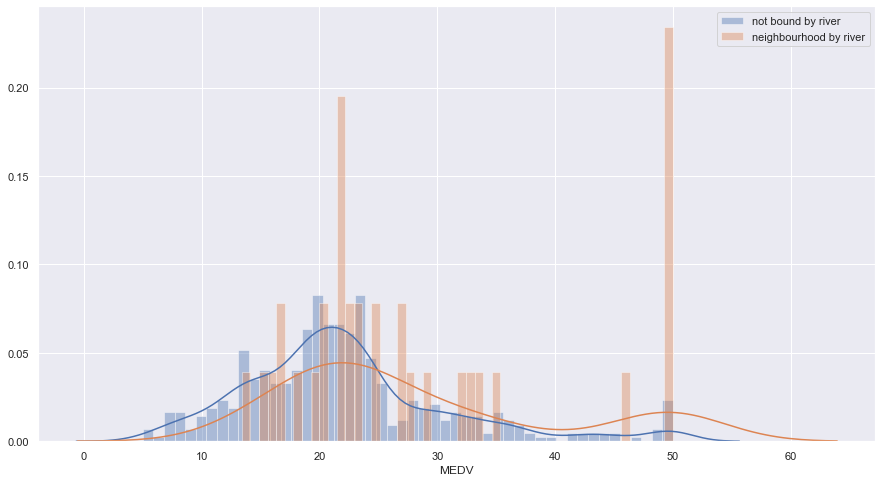

In [30]:
sns.set(rc={'figure.figsize':(15,8)})
sns.distplot(tract0, bins=50, label='not bound by river')
sns.distplot(tract1, bins=50, label='neighbourhood by river')
plt.legend()
plt.show()

***

### T-Test

The following analysis gives us an insight into both populations i.e. mean, standard deviation of the distribution and
the skewness of the distribution. When conducting a t-test it is important to understand these basic statistics so that you choose the correct t-test. 

I decided to use a welch's t-test to perform my analysis as the sample sizes will be different, will be unpaired and the  
variance is also different. See cells below for sample sizes, standard deviation and skewness. [30]

The null hypoteseis for this t-test is that the populations being tested tract 0 (houses not on the river tract) and tract 1 (houses on river tract) are not statistically significantly different. 

If the P Value is less than 0.5 then we reject the null hypotesis as we have more than 95% confidence that the conclusion of the test will be valid and not just down to random chance.

 ##### Understanding the characteristics of the data

In [31]:
##check for similar standard deviations 
boston.groupby('CHAScat')['MEDV'].std()

CHAScat
0.0     8.831362
1.0    11.816643
Name: MEDV, dtype: float64

In [32]:
##check for similar means
boston.groupby('CHAScat')['MEDV'].mean()

CHAScat
0.0    22.093843
1.0    28.440000
Name: MEDV, dtype: float64

In [33]:
##check population sizes
boston.groupby('CHAScat')['MEDV'].count()

CHAScat
0.0    471
1.0     35
Name: MEDV, dtype: int64

In [34]:
##check for similar variances in population
boston.groupby('CHAScat')['MEDV'].skew()

CHAScat
0.0    1.056908
1.0    0.943012
Name: MEDV, dtype: float64

In [35]:
import matplotlib.patches as mpatches

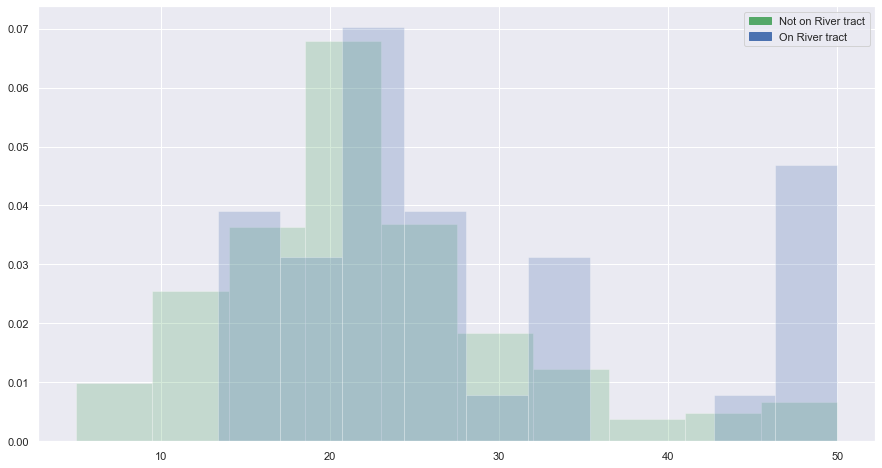

In [36]:
green_patch = mpatches.Patch(color='g', label='Not on River tract')
blue_patch = mpatches.Patch(color='b', label='On River tract')

plt.hist(tract0, density=True, color='g', alpha=0.25)
plt.hist(tract1, density=True, color='b', alpha=0.25)

plt.legend(handles=[green_patch,blue_patch])

In [37]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
ttest = ss.ttest_ind(tract0,tract1,equal_var = False)
ttest

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

We can see that the pvalue is less than 0.5 and the null hypotesis can be rejected. 

## Predict using Keras Neural Networks

![Neuron](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Keras+Python+Tutorial/content_content_neuron.png)

#### What is a Neural Network? 

"Neural networks are a set of *algorithms*, modeled loosely after the human brain, that are designed to *recognize patterns*. 
They interpret sensory data through a kind of machine perception, labeling or clustering raw input. 
The patterns they recognize are *numerical*, contained in *vectors*, into which all real-world data, be it images, sound, text or 
time series, must be translated." [9]

Neural networks were first proposed in 1944 by Warren McCullough and Walter Pitts, two University of Chicago researchers who moved to MIT in 1952 as founding members of what’s sometimes called the first cognitive science department. [10] 

Although neural networks have been around for 70 years their application has been bolstored by the increasing processing power of computer chips.

#### How does a Neural Network work?

Modeled loosely on the human brain, a neural net consists of thousands or even millions of simple processing **nodes** that are densely interconnected. Most of today’s neural nets are organized into **layers of nodes**, 
and they’re **feed-forward,** meaning that data moves through them in only one direction. 
An individual node might be **connected to several nodes** in the layer beneath it, from which it receives data, and several nodes in the layer above it, to which it sends data.




To each of its incoming connections, a node will assign a number known as a **weight**. 
When the network is active, the node receives a different data item — a different number — over each of its connections and multiplies it by the associated weight. 

It then adds the resulting products together, yielding a single number. 

If that number is below a threshold value, the node passes no data to the next layer. 

If the number exceeds the threshold value,the node **fires** which in today’s neural nets generally means
sending the number — the **sum of the weighted inputs** — along all its outgoing connections.[10]

It is important to explain two functions that can radically change the output from your nodes and are called the:

     -  activation function and;
     -  optimisation function
    


#### Activation function

It is important to apply an activation function to introduce **non-linear** processing between the nodes otherwise
nodes would do their processing linearly paasing output to to the next node and you would end up with a linear model i.e. 
linear regression. If the relationships between the variables are non-linear the model will not train correctly as it will bypass datapoints not following a linear pattern resultung in **underfitting** which I will discuss shortly. Some commonly used activation functions are:
    - CUBE
    - RELU
    - SIGMOID
    - SOFTMAX
    - TANH
    
Later I will explain more about these functions as I will be using **RELU** as the activation function for my neural netowrk.

#### Optimisation function

Optimisation functions play an important role in **minimising the loss** in the neural networks training process by 
rebalancing the weights according to the error produced from the output in each node. [11] Some commonly used functions are:

    - ADADELTA
    - ADAGRAD
    - ADAM
    - SGD
    - LINE GRADIENT DESCENT
       
Further on I will explain more about these functions as I will be using **Adam** as the optimisation function for my neural
network

#### Loss , Epochs and Batch size

**Loss:** is a method to evaluate how well an algorithm models the data passed into the neural network.
      Loss is usually classifed into two categories: **Classification** and **regression**; and depending on the relationships
      between the variables you will choose an appropriate loss function, although not an exact science, yet! 
      Loss functions go hand in hand with an optimisation function and ideally they should **learn to reduce error in predictions**
      as the neural network goes through various iterations of learning. [13] I will be using **Mean Absolute error** as the loss function for my model with an explanation of the function further on.

**Epochs:** is the number of times the learning algorithm will iterate over the entire dataset. For each epoch the learning algorithm's internal paramaters will be fine tuned resulting in an improved loss on each iteration. 

**Batch:** The batch size determines how many samples the learning algorithm should pass over before the model is updated. Learning algorithm passes through each batch updating model parameters before moving onto the next epoch. Similar to epochs you need to adjust the batch sizes to see if the loss improves. [14]

#### Underfitting and Overfitting models

In layman's terms a model is underfitted when it **fails to learn the relationships** between the data i.e. 
we get a linear relationship rather than a more curve linear relationship.

A model is overfitted when there is **too much reliance** on the training data i.e. is too rigid and is of no use when data is
is passed into the model it has not seen before.

There are techniques to evaluate the performance of a model during training including holding back a **vaildation set** and a method called **cross-validation.** A validation set can be referred to as a pre-test where our training model is tested before being released on
the test data. This gives the model a chance to improve its learning by validating the data on each epoch. Using cross validation we split the training data into different subsets, or we can use multiple validation sets if we have lots of data.[15]

#### Neural Networks and their application in real life

**Classification**
Neural network typically uses cross sectional data. Solving these problems entails ‘learning’ patterns in a data set and constructing a model that can recognize these patterns. Commercial artificial neural network applications of this nature include:

    - Credit card fraud detection reportedly being used by Eurocard Nederland, Mellon Bank, First USA Bank
    - Petroleum exploration being used by Texaco and Arco to determine locations of underground oil and gas deposits
    
**Time Series**

Typically used to build a forecasting model from historical data that predicts future data points. Applications include:

    - Foreign exchange trading systems: Citibank London
    - Forecasting weather patterns
    
**Optimisation**

Used for finding solutions for a set of very difficult problems known as Non-Polynomial (NP) complete problems. These problems require unsupervised learning approaches i.e. the model does not have outputs to train itself. Examples as follows:

    - job-scheduling in manufacturing and; 
    - efficient routing problems involving vehicles or telecommunication [12]



## Neural Network  - Predict Median House Values

In this section I will build two neural networks that are differentiated by the preprocessing of the variables before being
passed to the network.

    - A neural network without preprocessing and standardisation of the variables
    - A neural network with scaling

I will use the independent variables RM and LSTAT as my inputs as they have a **strong correlation** with **MEDV** which theoretically should assist the model in finding patterns in the data. These variables will then be trained on the target variable MEDV.

It is important **not** to include features that are **highly intercorrelated** and as a rule of thumb variables with a correlation of higher than 0.7 should be excluded. RM and LSTAT have a correlation of -0.61. 

**Keras** library will be used as the **front-end API** for building the model and **tensorflow** library will carry out the calculations for the machine learning model. Keras has been broadly adopted by the
research and industry community with over 250,000 users in 2018. [7] The single biggest benefit TensorFlow provides for machine learning development is **abstraction.** A user can concentrate on the logic of the model rather than the details of code.[16]

**Sklearn** library will be used for splitting the data into training and testing samples while using the library for preprocessing
in second and third neural network.

Now I will import the libraries mentioned above:

In [38]:
import keras as kr
# For splitting the data
import sklearn.preprocessing as pre
# For splitting data sets.
import sklearn.model_selection as mod
# For whitening.
import sklearn.decomposition as dec

Using TensorFlow backend.


Next step is to assign the RM and LSTAT from the boston dataframe to 'Inputs' variable.

In [39]:
#inputs for training the model
inputs = boston[['RM','LSTAT']]
inputs.head()

,RM,LSTAT
0,6.575,4.98
1,6.421,9.14
2,7.185,4.03
3,6.998,2.94
4,7.147,5.33


Then assign 'MEDV' to the outputs variable.

In [40]:
# outputs for training the neural network
outputs = boston['MEDV']
outputs.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

### Neural Network 1

This is an important step as we need to set the variables for training our neural network while holding back a
percentage of the samples in the dataset for testing the model once compiled.

In [41]:
## https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html [17]
x_train, x_test, y_train, y_test = mod.train_test_split(inputs, outputs, test_size=0.3)

After assigning the variables into training and testing data the following code shows the shape of the data. 

In [42]:
## 
print ("Training data:\n",x_train, y_train)
print ("Test data:\n" ,x_test, y_test)

print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

Training data:
         RM  LSTAT
483  5.762  10.42
109  6.229  15.55
87   6.121   8.44
384  4.368  30.63
340  5.968   9.29
..     ...    ...
390  5.713  17.11
463  6.513  10.29
400  5.987  26.77
393  6.193  15.17
442  6.219  16.59

[354 rows x 2 columns] 483    21.8
109    19.4
87     22.2
384     8.8
340    18.7
       ... 
390    15.1
463    20.2
400     5.6
393    13.8
442    18.4
Name: MEDV, Length: 354, dtype: float64
Test data:
         RM  LSTAT
1    6.421   9.14
16   5.935   6.58
107  6.127  14.09
298  6.345   4.97
154  6.129  15.12
..     ...    ...
182  7.155   4.82
40   7.024   1.98
368  4.970   3.26
130  6.458  12.60
481  6.750   7.74

[152 rows x 2 columns] 1      21.6
16     23.1
107    20.4
298    22.5
154    17.0
       ... 
182    37.9
40     34.9
368    50.0
130    19.2
481    23.7
Name: MEDV, Length: 152, dtype: float64
(354, 2) (354,)
(152, 2) (152,)


Now the data is ready to be passed into the network but first I have to build the architecture
of the network. The following points describe the methods chosen for building the model:

**Sequential** 
A sequential model is a linear stack of layers that are compiled in sequence i.e. first layer is compiled, 
then the second layer and so on. I could of chosen a functional model that does not have to execute in sequence but as this
is a regression problem I feel sequential is the best fit. [18][19]

**Dense** 
Dense simply means that the layers are fully connected.

**input_dim** 
Is the shape of the inputs to be passed into the model i.e. inputs RM and LSTAT

**activation function:** 
I chose the activation function **relu** after some research and trials with other functions such as **sigmiod** and **tanh**. Relu function acts like a linear function, but is, in fact, a nonlinear function allowing complex relationships in the data to be learned. The function is linear for values greater than zero, meaning it has a lot of the desirable properties of a linear activation function when training a neural network. [20]. 

As the relationship between RM, LSTAT and MEDV has a high correlation and does have a near linear relationship relu was chosen as the best fit for the first three hidden layers in the model. 

The ouput layer will be linear as the model output is one continuous variable, that is MEDV.

**Loss**
The mean absolute error **(MAE)** compares the actual values to the calculated values by summing up all the errors and dividing by the total number of errors [21]. 
MAE is an appropriate loss function if outliers exist and from earlier analysis we know that **outliers** do exist across all variables. Further, as the neural network is a a **regression model** MAE is an appropriate choice. [22]

**Optimiser**
I chose Adaptive Moment Estimation Algorithm **(ADAM)** as my optimizer for this model as it had a better loss outcome in combination with ReLU. Medium.Com explains how the fuction works:

"This algorithm simply estimates moments and uses them to optimize a function. It is essentially a combination of the gradient descent with momentum algorithm and the RMS (Root Mean Square) Prop algorithm.
The Adam algorithm calculates an **exponential weighted moving average of the gradient** and then **squares the calculated gradient.** This algorithm has two decay parameters that control the decay rates of these calculated moving averages." [23]


In [43]:
# Create a new neural network.
m = kr.models.Sequential()

m.add(kr.layers.Dense(100, input_dim=2, activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(50, activation="relu"))
m.add(kr.layers.Dense(1))
# Compile the model.
m.compile(loss="mean_absolute_error", optimizer="Adam")

Now I use the fit method to train the data. The algorithm will iterate over the training data 50 times (epochs). During
each iteration the internal learning parameters of the model will be updated after each batch of 25 samples. 

I included the parameter **validation split** so that the model could validate its learning on the last 10% of the dataset, tuning its parameters before moving onto the next epoch. 

In [44]:
history = m.fit(x_train, y_train, epochs=50, batch_size=25,validation_split=0.1)

Train on 318 samples, validate on 36 samples
Epoch 1/50
318/318 [==============================] - 1s 3ms/step - loss: 20.0201 - val_loss: 13.9699
Epoch 2/50
318/318 [==============================] - 0s 182us/step - loss: 14.4051 - val_loss: 11.2080
Epoch 3/50
318/318 [==============================] - 0s 255us/step - loss: 12.5138 - val_loss: 9.9833
Epoch 4/50
318/318 [==============================] - 0s 255us/step - loss: 10.4539 - val_loss: 7.7239
Epoch 5/50
318/318 [==============================] - 0s 182us/step - loss: 7.8405 - val_loss: 5.0122
Epoch 6/50
318/318 [==============================] - 0s 167us/step - loss: 4.8150 - val_loss: 3.0712
Epoch 7/50
318/318 [==============================] - 0s 170us/step - loss: 3.8447 - val_loss: 2.6617
Epoch 8/50
318/318 [==============================] - 0s 170us/step - loss: 3.8538 - val_loss: 2.5375
Epoch 9/50
318/318 [==============================] - 0s 220us/step - loss: 3.7330 - val_loss: 2.7490
Epoch 10/50
318/318 [============

So after fitting my model I can see that it starts off with a loss of about 21 and by the time it finishes learning
I get a loss of about 3.0. The model learns quite quickly but the rate of learning slows down after tenth iteration.

After running the model multiple times ,the validation loss and loss were quite similar so the model seemed to fit correctly if not overfitted but during some runs the validation loss is slightly lower. Possible reasons
for the validation test being lower is that it can be easier for the model to recognise patterns within a smaaler sample. [24]

The following graph is a visualisation of the learning rate on the training data, and also on thee
test data after being paased through the trained model. 

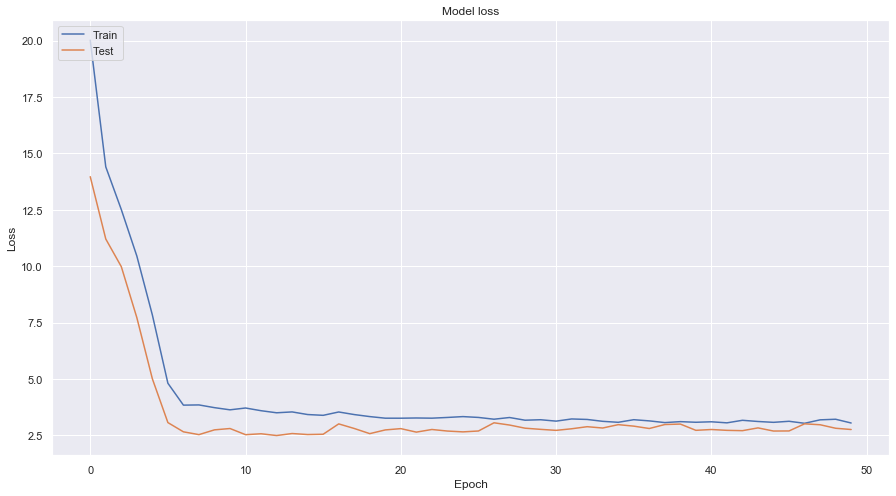

In [45]:
##https://keras.io/visualization/ [25]
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Next I will pass in the test data to the model and see if has a similar loss to the trained model:

In [46]:
##calculates loss on test data
scores = m.evaluate(x_test, y_test, verbose=0)
print (scores)

3.751437689128675


Model seems to be working well in the sense that test data has a similar loss to the trained data.

Next I want to predict the median house values using test data:

In [47]:
predictions = m.predict(x_test)
print("Predictions:\n",predictions[:10])


Predictions:
 [[23.252201]
 [22.692064]
 [18.930956]
 [25.89871 ]
 [18.242918]
 [34.481106]
 [33.560425]
 [39.53171 ]
 [18.17721 ]
 [12.872577]]


If I compare the predicted values to the orignal test data I can that the results are similar - see below:

In [48]:
##turns pandas series into numpy array
print("Test:\n",y_test[:10])

Test:
 1      21.6
16     23.1
107    20.4
298    22.5
154    17.0
57     31.6
55     35.4
275    32.0
431    14.1
423    13.4
Name: MEDV, dtype: float64


In [49]:
##.T turns rows into columns / get squared mean difference to see difference between the output from predictions
## and test data
np.sum((m.predict(x_test).T - y_test.as_matrix())**2)

C:\Users\Donal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


4283.893184710976

4283 represents the dollar difference in the predicted values based on the trained model versus the test data. It is open to
interpretetation as to whether this is a significant difference or not. Initially this loss was under 3,000 but on the
last run of the model the difference has risen.

Next I want to visualise the predicted values versus the test data to see if distributions are similar. 

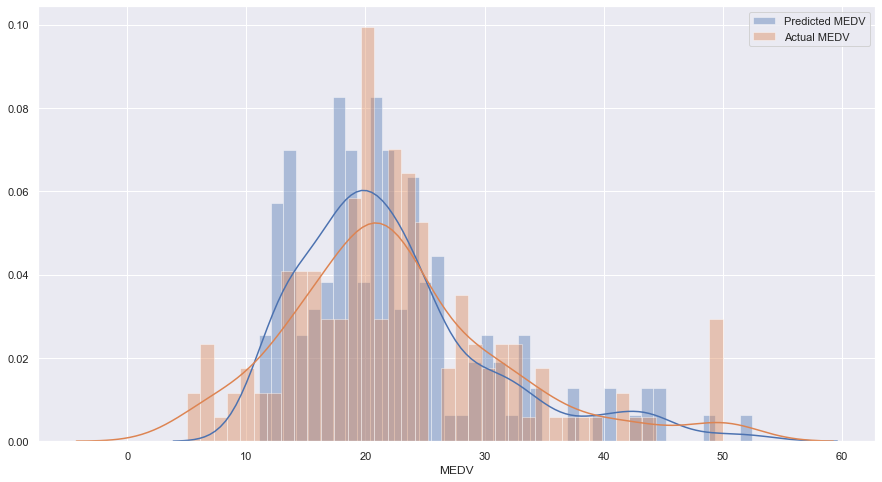

In [50]:
##https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0 [26]
##Predicted MEDV vs Actual EDV
sns.distplot(predictions, bins=40, label='Predicted MEDV')
sns.distplot(y_test, bins=40, label='Actual MEDV')
plt.legend()
plt.show()

We can see that that the distributions do overlap and the mean is is quite similar.

### Neural Network 2 using Scaling

For this model, I will scale the data using Sklearn preprocessing library. 

**Standardization** of datasets is a common requirement for many machine learning models implemented in scikit-learn; 
they might behave badly if the individual features do not more or less look like standard normally distributed data. 

The idea of scaling the data is to stop one variable with a **dominant variance** overly influencing the internal learning
parameters of the model. 

"The **preprocessing** module further provides a utility class **StandardScaler** that implements the Transformer API
to *compute the mean and standard deviation on a training set* so as to be able to later reapply the 
*same transformation on the testing set*". [27]

In [51]:
scaler = pre.StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)

I follow the same steps as I did with Neural Network 1 i.e. same parameters for the neural network.

In [52]:

m = kr.models.Sequential()

m.add(kr.layers.Dense(100, input_dim=2, activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(50, activation="relu"))
m.add(kr.layers.Dense(1))

m.compile(loss="mean_absolute_error", optimizer="Adam")

In [53]:
m.fit(x_train_scaled, y_train, epochs=50, batch_size=25)

Epoch 1/50
354/354 [==============================] - 1s 3ms/step - loss: 21.7254
Epoch 2/50
354/354 [==============================] - 0s 223us/step - loss: 18.9059
Epoch 3/50
354/354 [==============================] - 0s 234us/step - loss: 12.7564
Epoch 4/50
354/354 [==============================] - 0s 217us/step - loss: 6.5493
Epoch 5/50
354/354 [==============================] - 0s 164us/step - loss: 5.1565
Epoch 6/50
354/354 [==============================] - 0s 169us/step - loss: 4.5697
Epoch 7/50
354/354 [==============================] - 0s 164us/step - loss: 4.3874
Epoch 8/50
354/354 [==============================] - 0s 181us/step - loss: 3.9730
Epoch 9/50
354/354 [==============================] - 0s 254us/step - loss: 3.7276
Epoch 10/50
354/354 [==============================] - 0s 316us/step - loss: 3.5671
Epoch 11/50
354/354 [==============================] - 0s 220us/step - loss: 3.4835
Epoch 12/50
354/354 [==============================] - 0s 195us/step - loss: 3.4155


The **loss is smaller** after scaling the data and below are the predicted vs test results which match up well.

In [54]:
x_test_scaled = scaler.transform(x_test)
predictions2 = m.predict(x_test_scaled).round().T
predictions2

array([[22., 21., 19., 24., 19., 30., 35., 31., 13., 12., 17., 17., 12.,
        12., 22., 20., 20., 17., 18., 10., 22., 18., 20., 50., 20., 21.,
        14., 49., 15., 20., 11., 37., 12., 15., 20., 28., 16., 21., 33.,
        15., 31., 13., 39., 13., 18., 16., 34., 26., 11., 25., 29., 20.,
        27., 23., 23., 31., 19., 20., 21., 20., 12., 20., 12., 27., 21.,
        41., 25., 18., 20., 24., 10., 26., 27., 35., 11., 50., 20., 11.,
        21., 22., 25., 22., 11., 13., 23., 19., 13., 30., 15., 17., 17.,
        12., 21., 32., 24., 16., 10., 38., 21., 20., 20., 44., 21., 22.,
        15., 20., 20., 11., 18., 21., 20., 19., 33., 21., 25., 23., 23.,
        13., 10., 24., 20., 21., 20., 29., 18., 20., 30., 12., 18., 31.,
        24., 11., 19., 23., 25., 20., 26., 15., 20., 30., 22., 19., 19.,
        20., 18., 20., 21., 33., 34., 24., 20., 26.]], dtype=float32)

In [55]:
y_test.as_matrix().astype(np.float32)

C:\Users\Donal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([21.6, 23.1, 20.4, 22.5, 17. , 31.6, 35.4, 32. , 14.1, 13.4, 14.9,
       12.6,  5. , 17.2, 23.4, 21. , 17.5, 21.9, 11.7, 17.9, 22.4, 16.1,
       20. , 41.7, 20.3, 20.4, 13.3, 50. , 14.9, 22.6, 17.8, 39.8,  8.4,
       15.2, 19.7, 30.1, 21.5, 20.4, 33.4, 13.1, 37. ,  5. , 44. ,  7.2,
       20.4, 16.1, 32.9, 29.8, 13.8, 23.9, 31.1, 22.9, 22. , 16.5, 28.7,
       41.3, 16.8, 20.6, 20.5, 22.5, 15.6, 19.3,  7. , 31.5, 20.6, 50. ,
       29. , 10.2, 24. , 27.1,  7. , 24.8, 30.8, 43.1, 12. , 21.9, 22.7,
       13.8, 18.2, 26.4, 25. , 23.6, 10.4, 16.3, 24.4, 20.2, 15.4, 33. ,
       14.3, 19.9, 19. , 20. , 22.3, 29.6, 28.7, 14.3, 13.8, 35.2, 20.5,
       21.2, 18.5, 50. , 25. , 23.2, 14.5, 16.2, 18.9,  9.5, 23.2, 23.8,
       21.2, 22. , 50. , 23.4, 32.5, 28.4, 24.2, 11.5,  7.2, 27.5, 19. ,
       25. , 15. , 35.1, 18.4, 19.6, 23.9,  8.7, 26.4, 28.5, 27.5,  7.4,
       18.7, 25.2, 28.4, 20.7, 28.6, 13.1, 16.1, 31.2, 24.8, 24.4, 19.1,
       20.3, 22.4, 19.5, 19.8, 37.9, 34.9, 50. , 19

In [56]:
scores = m.evaluate(x_test_scaled, y_test, verbose=0)
print (scores)

3.2311252920251143


In [57]:
np.sum((m.predict(x_test_scaled).T - y_test.as_matrix())**2)

C:\Users\Donal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


3689.213301827937

3689 represents the dollar difference in the predicted values based on the trained model versus the test data. It is open to
interpretetation as to whether this is a significant difference or not.

Next I want to visualise the predicted values versus the test data to see if distributions are similar. 

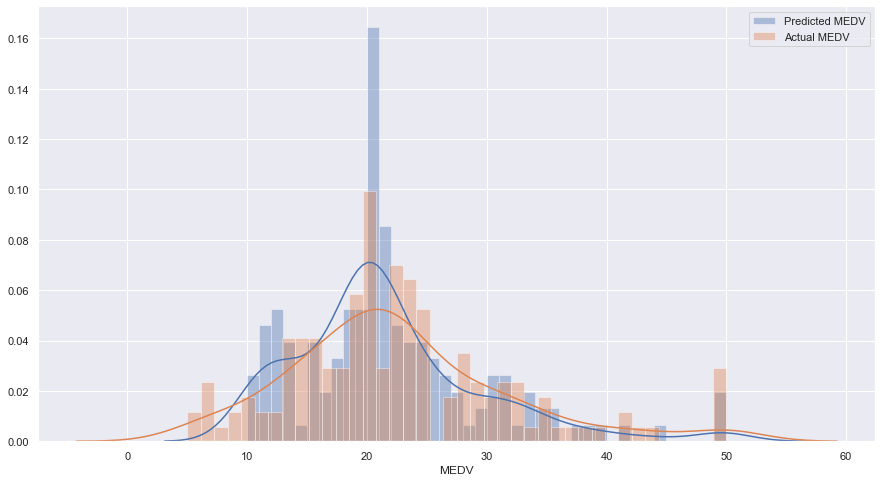

In [58]:
##https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0 [26]
##Predicted MEDV vs Actual EDV
sns.distplot(predictions2, bins=40, label='Predicted MEDV')
sns.distplot(y_test, bins=40, label='Actual MEDV')
plt.legend()
plt.show()

We can see that that the distributions do overlap for most of the population and the mean is similar.

Finally, I created a neural network with and without preprocessing and by using scaling I was able to achieve a lower loss value.

## Summary

In this analysis I focused on variables that had a strong correlation with Median House Prices. I split the analysis
into three different sections focusing on:
    - descriptive statistics, for three variables: LSTAT, RM and MEDV
    - inferential statistics, specifically CHAS variable and its relationship with MEDV
    - predict using neural networks.

My research into the Boston Housing dataset found that LSTAT and RM variables had a strong correlation with MEDV 
and my analysis using seaborn heatmaps and linear regression found this to be true. Using Neural Networks I was able to 
train my network using LSTAT and RM to predict MEDV. After passing in test data to the model I got a similar loss value and
by plotting the distributions I can see that the test data distribution is similar to the training data. Furthermore,
scaling the data did improve the loss value which indicates the importance of standardising your variables before creating
your neural network.

Overall this analysis is a good base to conduct further research into regression and neural networks while achieving its aim
to create a working neural network and analyse datasets using descriptive and inferential statistics. 

## References

[1] Delve 1996, 'The Boston Housing Datset', retrieved from https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html


[2] Harrison, D. & Rubinfeld, D.L. (1978). "Hedonic prices and the demand for clean air", J. Environ. Economics & Management, vol.5, 81-102

[3] Haydar A, "learning-data-science-day-9-linear-regression-on-boston-housing-dataset", retrieved from https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef

[4] Animesh A, "Linear Regression on Boston Housing Dataset", retrieved from https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

[5] Randerson, "Predict Boston House Prices Using Python & Linear Regression", retrieved from https://levelup.gitconnected.com/predict-boston-house-prices-using-python-linear-regression-90469e0a341

[6] Ng R, "Machine-learning-project-boston-home-prices", retrieved from https://www.ritchieng.com/machine-learning-project-boston-home-prices/

[7] 'Why use Keras', retrieved from https://keras.io/why-use-keras/

[8] Sharma AV, 'the-theory-of-everything/understanding-activation-functions-in-neural-networks' retrieved from https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0

[9] Nicholson, C, "A Beginner's Guide to Neural Networks and Deep Learning", retrieved from https://skymind.ai/wiki/neural-network

[10] Hardesty, L, "Explained: Neural networks" retrieved from http://news.mit.edu/2017/explained-neural-networks-deep-learning-0414

[11] Walia, A, "Types of Optimization Algorithms used in Neural Networks and Ways to Optimize Gradient Descent",retreived from
https://towardsdatascience.com/types-of-optimization-algorithms-used-in-neural-networks-and-ways-to-optimize-gradient-95ae5d39529f

[12] Ahire J, "Real world Applications of Artificial Neural Networks", retrieved from https://medium.com/@jayeshbahire/real-world-applications-of-artificial-neural-networks-a6a6bc17ad6a

[13] Parmar, R, "Common Loss functions in machine learning" retrieved from https://towardsdatascience.com/common-loss-functions-in-machine-learning-46af0ffc4d23

[14] Brownlee, J, "difference-between-a-batch-and-an-epoch", retrieved from, https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/

[15] Koehrsen, W,"Overfitting vs. Underfitting: A Complete Example" retrieved from https://towardsdatascience.com/overfitting-vs-underfitting-a-complete-example-d05dd7e19765

[16] Yegulalp, S, "what-is-tensorflow-the-machine-learning-library-explained", retrieved from, https://www.infoworld.com/article/3278008/what-is-tensorflow-the-machine-learning-library-explained.html

[17] Unknown, code retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

[18] Unknown, "Guide to the Sequential model", retrieved from https://keras.io/getting-started/sequential-model-guide/

[19] Lin, J, "keras-models-sequential-vs-functional", retrieved from https://jovianlin.io/keras-models-sequential-vs-functional/

[20] Brownlee, J, "A Gentle Introduction to the Rectified Linear Unit (ReLU)", retrieved from https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/

[21] Stephanie,"Absolute Error & Mean Absolute Error (MAE)", retrieved from, https://www.statisticshowto.datasciencecentral.com/absolute-error/

[22] Brownlee, J, "How to Choose Loss Functions When Training Deep Learning Neural Networks", retrieved from https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/

[23] Sultanov, J, "Adam optimization algorithm in Deep Learning", retrieved from https://medium.com/ai%C2%B3-theory-practice-business/adam-optimization-algorithm-in-deep-learning-9b775dacbc9f

[24] Unknown, "Determining when you are overfitting, underfitting, or just right?", retrieved from https://forums.fast.ai/t/determining-when-you-are-overfitting-underfitting-or-just-right/7732

[25] Unknown, code retrieved from https://keras.io/visualization/

[26] W, Koehrsen, "Histograms and Density Plots in Python",retrieved from https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0

[27] Scikit Learn, code retrieved from https://scikit-learn.org/stable/modules/preprocessing.html

[28] Moreno, A, Simple and multiple linear regression with Python, retrieved from https://towardsdatascience.com/simple-and-multiple-linear-regression-with-python-c9ab422ec29c

[29] Agarwal A ,"Polynomial Regression", retrieved from, https://towardsdatascience.com/polynomial-regression-bbe8b9d97491

[30] Stephanie, "welchs-test-for-unequal-variances", retrieved from https://www.statisticshowto.datasciencecentral.com/welchs-test-for-unequal-variances/